In [1]:
from scipy import special as spec
import numpy as np

In [ ]:
P = 10 # pressure gradient in the carotid artery (Pa/m)
f = 1 # frequency of the pulsatile flow (Hz)
u = 1 # kinematic viscosity of blood (m^2/s)
R = 0.005 # radius of the artery (m)
rho = 1060 # density of blood (kg/m^3)

In [ ]:
# Realistic physiological parameters for carotid artery blood flow

# Pressure gradient in the carotid artery (Pa/m)
# Typical systolic pressure drop over ~10 cm length: ~5-15 mmHg
# 10 mmHg ≈ 1333 Pa over 0.1 m → 13,330 Pa/m
P = 13330  # Pa/m (pressure gradient)

# Frequency of the pulsatile flow (Hz)
# Normal resting heart rate: 60-80 bpm
# 70 bpm = 70/60 = 1.17 Hz
f = 1.17  # Hz (heart rate frequency)

# Kinematic viscosity of blood (m²/s)
# Dynamic viscosity of blood ≈ 3-4 × 10⁻³ Pa·s
# Density of blood ≈ 1060 kg/m³
# Kinematic viscosity = dynamic viscosity / density
# ν = (3.5 × 10⁻³ Pa·s) / (1060 kg/m³) ≈ 3.3 × 10⁻⁶ m²/s
u = 3.5e-3 # 3.3e-6  # m²/s (kinematic viscosity of blood)

# Radius of the carotid artery (m)
# Common carotid artery diameter: 6-8 mm
# Radius ≈ 3.5 mm = 0.0035 m
R = 0.0035  # m (arterial radius)

# Density of blood (kg/m³)
# Blood density is slightly higher than water due to cellular components
# Typical range: 1025-1060 kg/m³
rho = 1060  # kg/m³ (blood density)

# Calculate the Womersley number parameter
a = np.sqrt(2*np.pi*f*rho/u)
print(f"Calculated parameters:")
print(f"Pressure gradient (P): {P:,.0f} Pa/m")
print(f"Heart rate frequency (f): {f:.2f} Hz ({f*60:.0f} bpm)")
print(f"Kinematic viscosity (u): {u:.1e} m²/s")
print(f"Arterial radius (R): {R*1000:.1f} mm")
print(f"Blood density (rho): {rho} kg/m³")
print(f"Womersley parameter (a): {a:.1f}")

Calculated parameters:
Pressure gradient (P): 13,330 Pa/m
Heart rate frequency (f): 1.17 Hz (70 bpm)
Kinematic viscosity (u): 3.5e-03 m²/s
Arterial radius (R): 3.5 mm
Blood density (rho): 1060 kg/m³
Womersley parameter (a): 1492.1


In [44]:
r = np.linspace(0, R, 1000)
a = np.sqrt(2*np.pi*f*rho/u)
bessel_complex = P/(rho*1j*2*np.pi*f) * (1 - spec.jv(0, 1j ** (3/2) * a * r) / spec.jv(0, 1j ** (3/2) * a * R))


y=\left|\frac{1}{if}\left(1-\frac{J\left(0,i^{\frac{3}{2}}ax\right)}{J\left(0,i^{\frac{3}{2}}aR\right)}\right)\right|

In [13]:
speed_across_vessel()

4.4763396322594105


(array([0.00000000e+00, 3.00300300e-06, 6.00600601e-06, 9.00900901e-06,
        1.20120120e-05, 1.50150150e-05, 1.80180180e-05, 2.10210210e-05,
        2.40240240e-05, 2.70270270e-05, 3.00300300e-05, 3.30330330e-05,
        3.60360360e-05, 3.90390390e-05, 4.20420420e-05, 4.50450450e-05,
        4.80480480e-05, 5.10510511e-05, 5.40540541e-05, 5.70570571e-05,
        6.00600601e-05, 6.30630631e-05, 6.60660661e-05, 6.90690691e-05,
        7.20720721e-05, 7.50750751e-05, 7.80780781e-05, 8.10810811e-05,
        8.40840841e-05, 8.70870871e-05, 9.00900901e-05, 9.30930931e-05,
        9.60960961e-05, 9.90990991e-05, 1.02102102e-04, 1.05105105e-04,
        1.08108108e-04, 1.11111111e-04, 1.14114114e-04, 1.17117117e-04,
        1.20120120e-04, 1.23123123e-04, 1.26126126e-04, 1.29129129e-04,
        1.32132132e-04, 1.35135135e-04, 1.38138138e-04, 1.41141141e-04,
        1.44144144e-04, 1.47147147e-04, 1.50150150e-04, 1.53153153e-04,
        1.56156156e-04, 1.59159159e-04, 1.62162162e-04, 1.651651

In [15]:
from asl_bloch_sim.flow import speed_across_vessel
import numpy as np
import matplotlib.pyplot as plt
r, magnitude = speed_across_vessel(num=10, normalized=True, time=np.linspace(0, 2, 100))

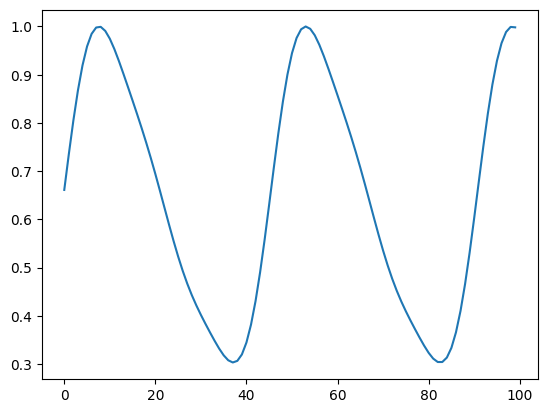

In [16]:
plt.plot(magnitude.max(axis=0))

In [19]:
r

array([0.    , 0.0003, 0.0006, 0.0009, 0.0012, 0.0015, 0.0018, 0.0021,
       0.0024, 0.0027, 0.003 ])

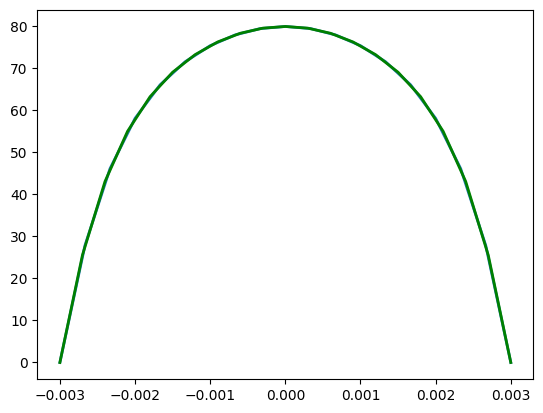

In [18]:
x = np.concatenate((-r[::-1], r))
y = np.concatenate((magnitude[::-1][:, 0], magnitude[:, 0])) * (magnitude.max() / magnitude[:, 0].max()) * 80
line, = plt.plot(x, y, lw=2)

r, magnitude = speed_across_vessel(num=11, normalized=True)
x = np.concatenate((-r[::-1], r))
y = np.concatenate((magnitude[::-1], magnitude)) * 80
line, = plt.plot(x, y, lw=2, color='green')

plt.show()

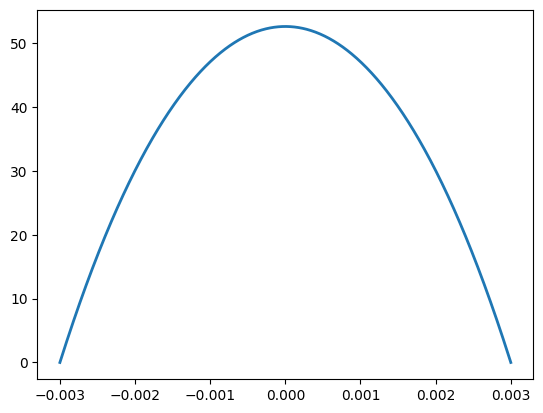

In [82]:
x = np.concatenate((-r[::-1], r))
y = np.concatenate((magnitude[::-1].mean(axis=1), magnitude.mean(axis=1))) * 80
line, = plt.plot(x, y, lw=2)
plt.show()

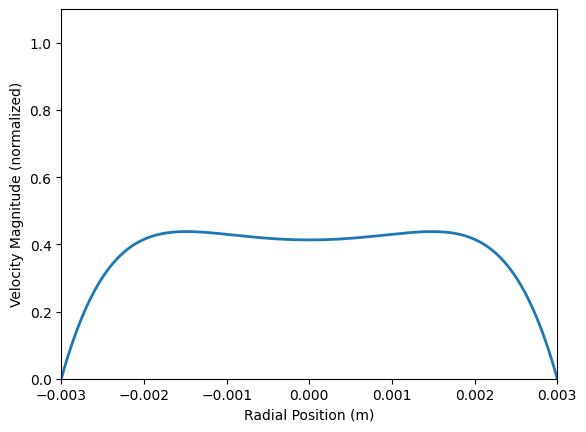

In [ ]:
# create animation using matplotlib of r vs magnitude over time
import matplotlib.pyplot as plt
import matplotlib.animation as animation
fig, ax = plt.subplots()
x = np.concatenate((-r[::-1], r))
y = np.concatenate((magnitude[::-1, 0], magnitude[:, 0])) * 80
line, = ax.plot(x, y, lw=2)
ax.set_xlim(-r.max(), r.max())
ax.set_ylim(0, 100)
ax.set_xlabel('Radial Position (m)')
ax.set_ylabel('Velocity Magnitude (normalized)')
def init():
    line.set_data(x, y)
    return line,
def animate(i):
    x = np.concatenate((-r[::-1], r))
    y = np.concatenate((magnitude[::-1, i], magnitude[:, i])) * 80
    line.set_data(x, y)
    return line,
ani = animation.FuncAnimation(fig, animate, init_func=init,
                                frames=magnitude.shape[1], interval=200, blit=True)
plt.show()

In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, LinearAxis, Range1d
from bokeh.layouts import column, row
from bokeh.palettes import Category10
output_notebook()

from asl_bloch_sim.flow import speed_across_vessel
import numpy as np

# r = np.linspace(0, R, 1000)
# # Calculate the complex Bessel function
# bessel_complex = 1/(1j * f) * (1 - spec.jv(0, 1j ** (3/2) * a * r) / spec.jv(0, 1j ** (3/2) * a * R))

# Extract components
# real_part = np.real(bessel_complex)
# imag_part = np.imag(bessel_complex)
r, magnitude = speed_across_vessel(num=500, normalized=True, time=np.linspace(0, 2, 100))
# phase = np.angle(bessel_complex)

# # Create figure for real and imaginary parts
# p1 = figure(width=600, height=400, title="Real and Imaginary Parts",
#             x_axis_label="r", y_axis_label="Value")

# # Plot real part
# real_line = p1.line(r, real_part, legend_label="Real",
#                    line_width=2, color=Category10[3][0], name="real")

# # Add second y-axis for imaginary part
# p1.extra_y_ranges = {"imag": Range1d(start=np.min(imag_part)*1.1,
#                                     end=np.max(imag_part)*1.1)}
# p1.add_layout(LinearAxis(y_range_name="imag",
#                         axis_label="Imaginary Part"), 'right')

# # Plot imaginary part
# imag_line = p1.line(r, imag_part, legend_label="Imaginary",
#                    line_width=2, color=Category10[3][1],
#                    y_range_name="imag", name="imag")

# # Add hover tools
# hover_real = HoverTool(renderers=[real_line], tooltips=[
#     ("r", "@x{0.000}"),
#     ("Real", "@y{0.000}")
# ])

# hover_imag = HoverTool(renderers=[imag_line], tooltips=[
#     ("r", "@x{0.000}"),
#     ("Imaginary", "@y{0.000}")
# ])

# p1.add_tools(hover_real, hover_imag)

# Create figure for magnitude and phase
p2 = figure(width=600, height=400, title="Magnitude and Phase",
            x_axis_label="r", y_axis_label="Magnitude")

# Plot magnitude
mag_line = p2.line(r, magnitude[:, 0], legend_label="Magnitude",
                    line_width=2, color='pink', name="magnitude")
mag_line2 = p2.line(-r, magnitude[:, 0], legend_label="Magnitude",
                line_width=2, color='pink', name="magnitude")
# p2.line(r, 1 - (r/3e-3) ** 2, color='green', legend_label='Constant Pressure')
# p2.line(-r, 1 - (r/3e-3) ** 2, color='green', legend_label='Constant Pressure')

# p2.line(r, speed_across_vessel(num=15)[1].real, line_width=2)


# Add second y-axis for phase
# p2.extra_y_ranges = {"phase": Range1d(start=np.min(phase)*1.1,
#                                      end=np.max(phase)*1.1)}
# p2.add_layout(LinearAxis(y_range_name="phase",
#                         axis_label="Phase (radians)"), 'right')

# # Plot phase
# phase_line = p2.line(r, phase, legend_label="Phase",
#                     line_width=2, color='orange',
#                     y_range_name="phase", name="phase")

# Add hover tools
hover_mag = HoverTool(renderers=[mag_line], tooltips=[
    ("r", "@x{0.000}"),
    ("Magnitude", "@y{0.000}")
])

# hover_phase = HoverTool(renderers=[phase_line], tooltips=[
#     ("r", "@x{0.000}"),
#     ("Phase", "@y{0.000}")
# ])

p2.add_tools(hover_mag) #, hover_phase)

# Arrange plots
layout = column(p2)

show(layout)

Loading BokehJS ...

In [7]:
num_flow = 50000
position_offset = 0.04 # m
systolic = np.linspace(0.1, 1.2, 100)[:, np.newaxis] # m/s
flow_time, flow_velocity, flow_position = flow.holdsworth_cca(stop=duration + 0.5, num=num_flow, systolic_velocity=systolic, diastolic_velocity=0.12)
flow_position -= position_offset

NameError: name 'np' is not defined

In [5]:
np.abs(bessel_complex).mean()

NameError: name 'np' is not defined

In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, Slider, ColumnDataSource, CustomJS
from bokeh.layouts import column, row
from bokeh.io import push_notebook, curdoc
from bokeh.application import Application
from bokeh.application.handlers import FunctionHandler
from bokeh.server.server import Server
import threading
import time

output_notebook()

def create_interactive_bessel_plot_server(R=5):
    """
    Create an interactive plot of complex Bessel function using embedded Bokeh server.

    Parameters
    ----------
    R : float, optional
        Extent for plotting, will plot from 0 to R, by default 5

    Returns
    -------
    None
        Displays the interactive plot with embedded server
    """
    def modify_doc(doc):
        """
        Modify the Bokeh document to add interactive elements.

        Parameters
        ----------
        doc : bokeh.document.Document
            The Bokeh document to modify
        """
        # Create r array
        r = np.linspace(0, R, 1000)

        # Calculate initial values
        f_init = 1.0
        u_init = 1.0
        a_init = np.sqrt(f_init/u_init)
        bessel_complex_init = 1/(1j * f_init) * (1 - spec.jv(0, 1j ** (3/2) * a_init * r) / spec.jv(0, 1j ** (3/2) * a_init * R))
        magnitude_init = np.abs(bessel_complex_init)

        # Create data source
        source = ColumnDataSource(data=dict(
            r=r,
            magnitude=magnitude_init
        ))

        # Create figure
        p = figure(width=700, height=400,
                   title=f"Bessel Function Magnitude (f={f_init:.1f}, u={u_init:.1f}, a={a_init:.2f})",
                   x_axis_label="r", y_axis_label="Magnitude")

        # Plot magnitude
        line = p.line('r', 'magnitude', source=source, line_width=3, color='blue')

        # Add hover tool
        hover = HoverTool(tooltips=[
            ("r", "@r{0.000}"),
            ("Magnitude", "@magnitude{0.000}")
        ])
        p.add_tools(hover)

        # Create sliders
        f_slider = Slider(start=0.1, end=5.0, value=f_init, step=0.1,
                         title="Frequency (f)", width=300)
        u_slider = Slider(start=0.1, end=5.0, value=u_init, step=0.1,
                         title="Viscosity (u)", width=300)

        # Python callback function
        def update_data(attr, old, new):
            """
            Update plot data when sliders change.

            Parameters
            ----------
            attr : str
                Attribute that changed
            old : float
                Old value
            new : float
                New value
            """
            f = f_slider.value
            u = u_slider.value
            a = np.sqrt(f/u)

            # Calculate new Bessel function values
            bessel_complex = 1/(1j * f) * (1 - spec.jv(0, 1j ** (3/2) * a * r) / spec.jv(0, 1j ** (3/2) * a * R))
            magnitude = np.abs(bessel_complex)

            # Update data source
            source.data = dict(r=r, magnitude=magnitude)

            # Update title
            p.title.text = f"Bessel Function Magnitude (f={f:.1f}, u={u:.1f}, a={a:.2f})"

        # Connect sliders to callback
        f_slider.on_change('value', update_data)
        u_slider.on_change('value', update_data)

        # Create layout
        sliders = column(f_slider, u_slider)
        layout = row(sliders, p)

        # Add to document
        doc.add_root(layout)

    # Create and start server
    apps = {'/': Application(FunctionHandler(modify_doc))}
    server = Server(apps, port=5007, allow_websocket_origin=["localhost:5007"])
    server.start()

    # Open in notebook
    server.io_loop.add_callback(server.show, "/")

    return server

Loading BokehJS ...

In [35]:
server = create_interactive_bessel_plot_server(R)